In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [106]:
# Import data
df = pd.read_csv('~/Documents/GitHub/data/schiff c-csiaa data from schiff_larsen_in prog.csv')
df = df[['Group ID','Group ID2','Feature', 'Ala', 'Asx', 'Glx', 'Gly', 'Ser', 'Pro', 'Ile', 'Leu', 'Lys', 'Phe', 'Thr', 'Tyr', 'Val']]
df

,Group ID,Group ID2,Feature,Ala,Asx,Glx,Gly,Ser,Pro,Ile,Leu,Lys,Phe,Thr,Tyr,Val
0,B1,Bacteria,Bacteria,-11.3,-12.9,-11.5,-12.9,NaN,NaN,-12.0,-12.8,-10.4,-18.8,-5.2,-16.8,-13.6
1,B2,Bacteria,NaN,-12.2,-17.6,-17.8,-13.9,NaN,NaN,-12.9,-13.0,-14.9,-17.0,-8.2,-18.1,-14.1
2,B3,Bacteria,NaN,-15.9,-21.8,-18.3,-21.3,NaN,NaN,-18.9,-19.9,-20.3,-24.6,-15.0,-22.9,-20.8
3,B4,Bacteria,Bacteria,-22.6,-22.7,-22.9,-25.3,NaN,NaN,-23.7,-25.2,-21.2,-28.9,-15.1,-27.7,-26.4
4,B5,Bacteria,NaN,-14.8,-17.4,-16.5,-13.8,NaN,NaN,-16.1,-17.7,-14.8,-18.3,-8.3,-18.0,-17.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,Prochlorococcus,Prokaryote,Non-N2 fixing,-5.5,-0.5,-13.8,-41.6,-6.8,-12.4,-12.8,-21.5,NaN,-22.1,-9.5,NaN,-17.6
164,Rhodococcous,Prokaryote,Heterotrophic bacteria,-28.3,-24.7,-25.9,-37.3,-19.3,-20.0,-27.3,-26.2,-23.8,-29.2,-18.4,NaN,-26.8
165,Actinobacteria,Prokaryote,Heterotrophic bacteria,-28.6,-24.9,-25.3,-38.0,-19.2,-20.2,-28.0,-26.5,-22.3,-29.5,-18.2,NaN,-27.8
166,Burkholderia xenovorans,Prokaryote,Heterotrophic bacteria,-12.5,-12.8,-14.5,-12.2,1.2,-8.5,-14.2,-12.9,-10.1,-19.0,-10.1,NaN,-16.0


In [107]:
# Isolate EAA
df = df[['Group ID','Feature', 'Phe', 'Thr', 'Ile', 'Leu', 'Val']]
df

,Group ID,Feature,Phe,Thr,Ile,Leu,Val
0,B1,Bacteria,-18.8,-5.2,-12.0,-12.8,-13.6
1,B2,NaN,-17.0,-8.2,-12.9,-13.0,-14.1
2,B3,NaN,-24.6,-15.0,-18.9,-19.9,-20.8
3,B4,Bacteria,-28.9,-15.1,-23.7,-25.2,-26.4
4,B5,NaN,-18.3,-8.3,-16.1,-17.7,-17.8
...,...,...,...,...,...,...,...
163,Prochlorococcus,Non-N2 fixing,-22.1,-9.5,-12.8,-21.5,-17.6
164,Rhodococcous,Heterotrophic bacteria,-29.2,-18.4,-27.3,-26.2,-26.8
165,Actinobacteria,Heterotrophic bacteria,-29.5,-18.2,-28.0,-26.5,-27.8
166,Burkholderia xenovorans,Heterotrophic bacteria,-19.0,-10.1,-14.2,-12.9,-16.0


In [113]:
# Split into two datasets
df_train = df[(df['Feature'] == 'Cyanobacteria') | (df['Feature'] == 'Macroalgae') 
              | (df['Feature'] == 'Microalgae') | (df['Feature'] == 'Seagrasses')]
df_train = df_train[['Group ID','Feature', 'Phe', 'Thr', 'Ile', 'Leu', 'Val']]
df_train = df_train.dropna()

df_test = df[(df['Feature'] == 'Leiopathes-post') | (df['Feature'] == 'Leiopathes-pre')]

In [114]:
df_train

,Group ID,Feature,Phe,Thr,Ile,Leu,Val
34,R1,Macroalgae,-19.2,-6.4,-17.3,-20.2,-19.2
35,R2,Macroalgae,-20.7,-4.8,-15.4,-19.5,-21.3
36,R3,Macroalgae,-25.3,-9.2,-21.7,-25.8,-25.4
37,R4,Macroalgae,-23.7,-11.0,-17.0,-21.9,-19.8
38,R5,Macroalgae,-25.3,-15.3,-19.5,-22.5,-22.4
39,R6,Macroalgae,-21.1,-8.7,-16.5,-21.0,-20.7
40,R7,Macroalgae,-21.1,-5.9,-16.7,-21.0,-20.3
41,R8,Macroalgae,-22.0,-7.3,-18.0,-23.5,-23.6
42,R9,Macroalgae,-22.5,-6.8,-20.4,-23.4,-20.9
43,P1,Macroalgae,-19.4,-3.6,-17.6,-23.1,-18.8


In [116]:
df_test

,Group ID,Feature,Phe,Thr,Ile,Leu,Val
131,STET-4904 7,Leiopathes-post,-19.623750,-7.448889,-12.163636,-25.172121,-15.392533
132,STET-4904 8,Leiopathes-post,-21.996354,-1.860000,-16.820061,-24.690121,-16.709400
133,STET-4904 22,Leiopathes-post,-19.587812,-4.630303,-12.309727,-24.130273,-15.469500
134,STET-4904 25,Leiopathes-post,-22.747031,-5.781667,-9.529455,-22.147182,-16.270700
135,STET-4904 40,Leiopathes-pre,-21.797734,-0.220303,-15.017182,-21.781455,-15.897200
136,STET-4904 46,Leiopathes-pre,-20.357031,1.686869,-12.158030,-26.378636,-16.711833
137,STET-4904 103,Leiopathes-pre,-21.560859,-4.580303,-12.473273,-22.838000,-20.469200
138,STET-4904 109,Leiopathes-pre,-19.111016,-4.384091,-12.110909,-20.853273,-16.111000
139,STET-4904 135,Leiopathes-pre,-22.362500,-5.630303,-14.977455,-24.698545,-16.792400
140,STET-4904 170,Leiopathes-pre,-21.988047,-0.651768,-8.972879,-25.730152,-16.371833


In [122]:
df_pca = pd.concat([df_train, df_test], axis=0)
df_pca = df_pca.reset_index()

df_pca

,index,Group ID,Feature,Phe,Thr,Ile,Leu,Val
0,34,R1,Macroalgae,-19.200000,-6.400000,-17.300000,-20.200000,-19.200000
1,35,R2,Macroalgae,-20.700000,-4.800000,-15.400000,-19.500000,-21.300000
2,36,R3,Macroalgae,-25.300000,-9.200000,-21.700000,-25.800000,-25.400000
3,37,R4,Macroalgae,-23.700000,-11.000000,-17.000000,-21.900000,-19.800000
4,38,R5,Macroalgae,-25.300000,-15.300000,-19.500000,-22.500000,-22.400000
5,39,R6,Macroalgae,-21.100000,-8.700000,-16.500000,-21.000000,-20.700000
6,40,R7,Macroalgae,-21.100000,-5.900000,-16.700000,-21.000000,-20.300000
7,41,R8,Macroalgae,-22.000000,-7.300000,-18.000000,-23.500000,-23.600000
8,42,R9,Macroalgae,-22.500000,-6.800000,-20.400000,-23.400000,-20.900000
9,43,P1,Macroalgae,-19.400000,-3.600000,-17.600000,-23.100000,-18.800000


In [22]:
# df_train.to_csv('~/Documents/GitHub/data/training_set.csv', index = False)

In [44]:
# df_train = pd.read_csv('~/Documents/GitHub/data/training_set_02252020.csv')

# groups = ['Bacteria','Red algae','Brown algae','Cyanobacteria','Diatom','Coccolithophore','Chlorophyte','Seagrasses']
# df_train = df_train[df_train.Feature.isin(groups)] # Drop unwanted groups
# df_train = df_train.reset_index()

# df_train

In [126]:
# PCA
# Separating out the features
features = ['Phe', 'Thr', 'Ile', 'Leu', 'Val']

x = df_pca.loc[:, features].values
# xmean = x.mean(axis=1, keepdims = True)
# x = x - xmean # Normalize to the mean of each row

# Separating out the target
y = df_pca.loc[:,['Feature']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=4)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, 
                           columns = ['principal component 1', 'principal component 2', 
                                      'principal component 3', 'principal component 4'])

In [127]:
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4
0,-0.511501,0.395292,0.129614,-0.360686
1,-0.487770,0.053712,-0.005749,-0.590829
2,1.694246,-0.268462,0.094631,-0.433841
3,0.404440,0.143858,-0.729760,-0.424862
4,1.328906,0.477201,-0.917430,-0.595948
5,-0.028671,0.320139,-0.275731,-0.348844
6,-0.232259,0.028048,-0.016991,-0.426134
7,0.588188,-0.023182,0.109115,-0.236940
8,0.525415,-0.099449,0.217387,-0.413024
9,-0.418001,-0.142062,0.468910,-0.003253


In [128]:
finalDf = pd.concat([principalDf, df_pca[['Feature']]], axis = 1)
print(finalDf)

finalDf['Feature'].unique()

    principal component 1  principal component 2  principal component 3  \
0               -0.511501               0.395292               0.129614   
1               -0.487770               0.053712              -0.005749   
2                1.694246              -0.268462               0.094631   
3                0.404440               0.143858              -0.729760   
4                1.328906               0.477201              -0.917430   
5               -0.028671               0.320139              -0.275731   
6               -0.232259               0.028048              -0.016991   
7                0.588188              -0.023182               0.109115   
8                0.525415              -0.099449               0.217387   
9               -0.418001              -0.142062               0.468910   
10              -1.106432              -0.354734               0.354297   
11               0.462541              -0.335807               0.325694   
12              -1.315586

array(['Macroalgae', 'Cyanobacteria', 'Microalgae', 'Seagrasses',
       'Leiopathes-post', 'Leiopathes-pre'], dtype=object)

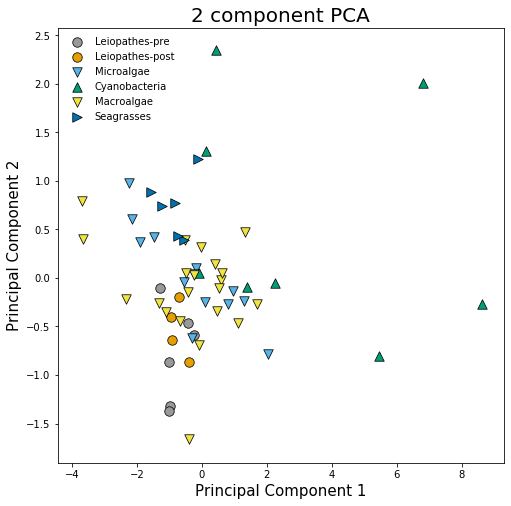

In [135]:
# 2D visualization
# Visualize 2D
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Leiopathes-pre', 'Leiopathes-post','Microalgae', 'Cyanobacteria', 'Macroalgae', 'Seagrasses']
colors = ["#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
markers = ['o', 'o','v', '^', 'v', '>',]
for target, color, marker in zip(targets,colors,markers):
    indicesToKeep = finalDf['Feature'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 90,
              linewidths=0.75,
              edgecolors = 'k',
              linestyle = 'None',
              marker = marker)
    plt.grid('None')
ax.legend(targets, frameon = False)
ax.grid()

# Save figure
plt.savefig('pca_d13c.png', dpi=300, bbox_inches='tight')